<a href="https://colab.research.google.com/github/riobagas02/PCVK_Ganjil_2024/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


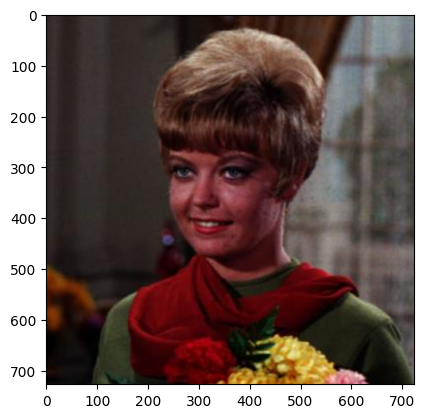

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

img_f = cv.imread('/content/drive/MyDrive/PCVK/module5.png')
img_rgb = cv.cvtColor(img_f,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

# **1. Gamma Correction**

 Gamma Correction pada citra 
-----------------------------------------
Masukkan nilai Gamma : 3


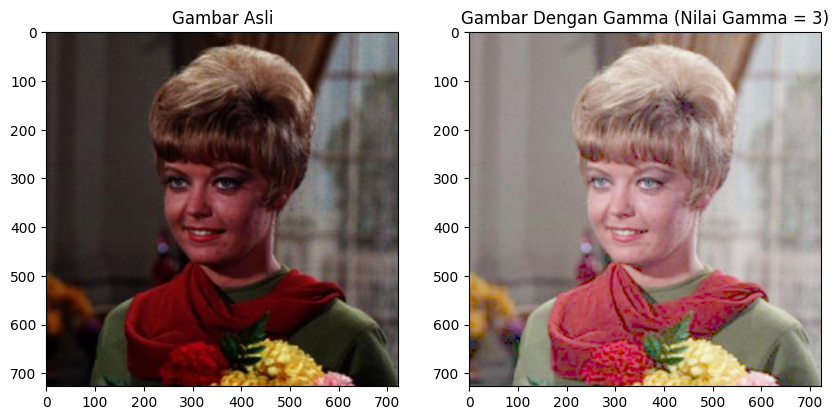

In [12]:
print(' Gamma Correction pada citra ')
print('-----------------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma : '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/module5.png')
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow  (original[y,x,c] / 255, (1 / gamma)), 0, 255)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(gamma_image, cv.COLOR_BGR2RGB))
plt.title(f'Gambar Dengan Gamma (Nilai Gamma = {gamma})')

plt.show()

# **2. Simulasi Image Depth**

Image Depth pada citra
----------------------


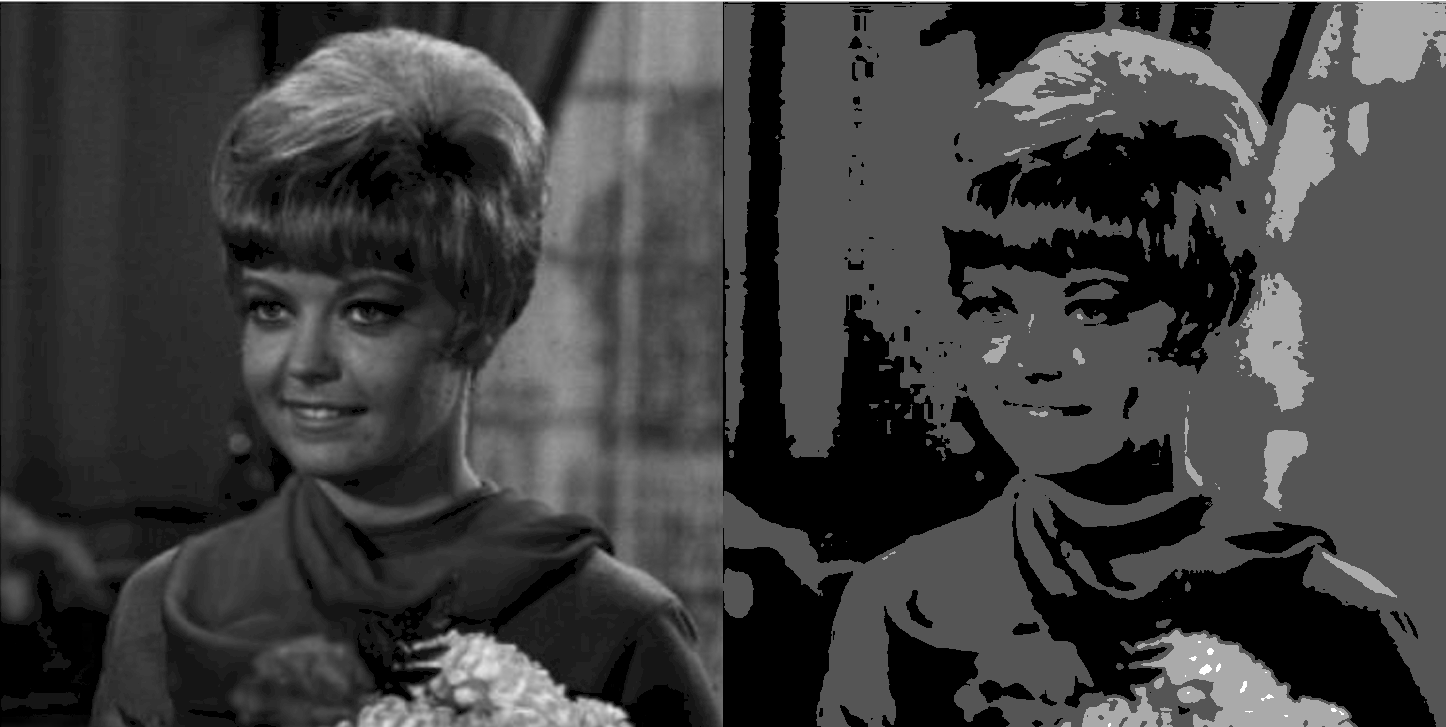

In [13]:
print('Image Depth pada citra')
print('----------------------')

bit_depth = 2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK/module5.png', cv.IMREAD_GRAYSCALE)
img_depth = np.zeros(original.shape,original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    img_depth[y,x] = np.clip(round(original[y,x] / level)*level,0,255)

final_frame = cv.hconcat((original,img_depth))
cv2_imshow(final_frame)

# **3. Average Denoising**

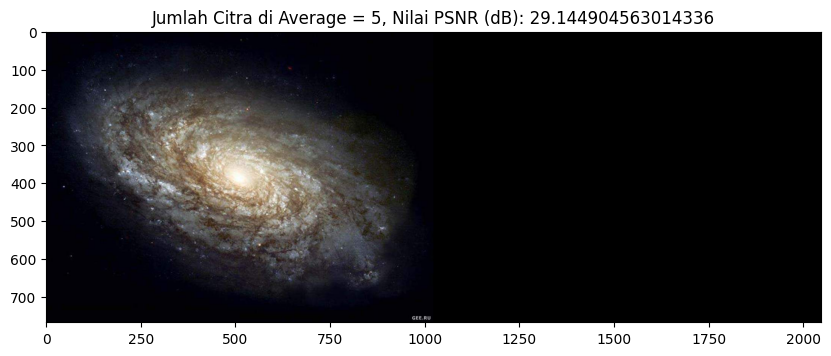

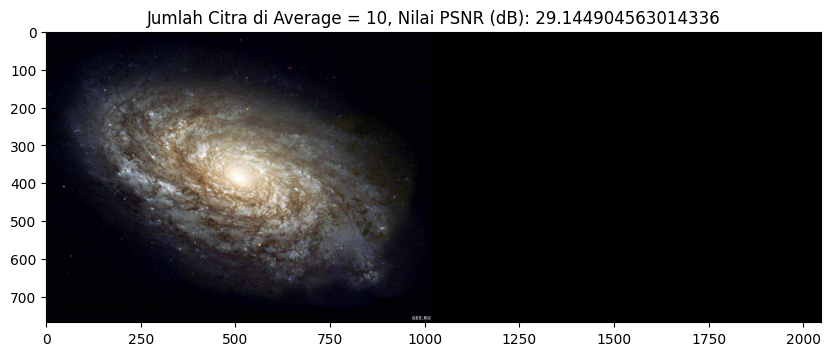

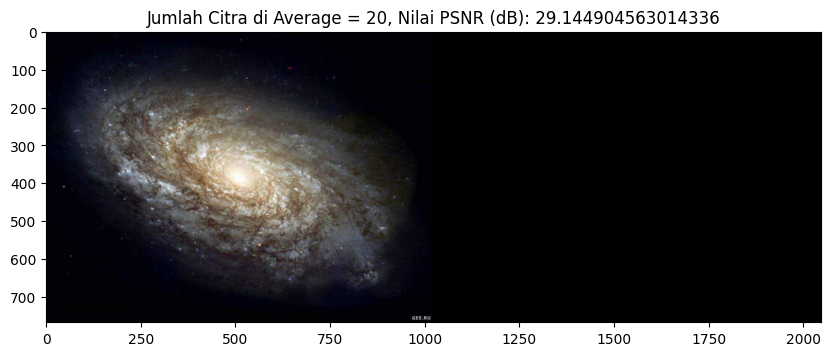

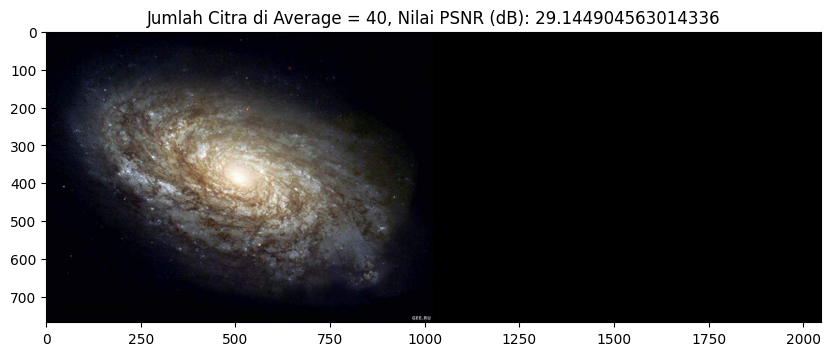

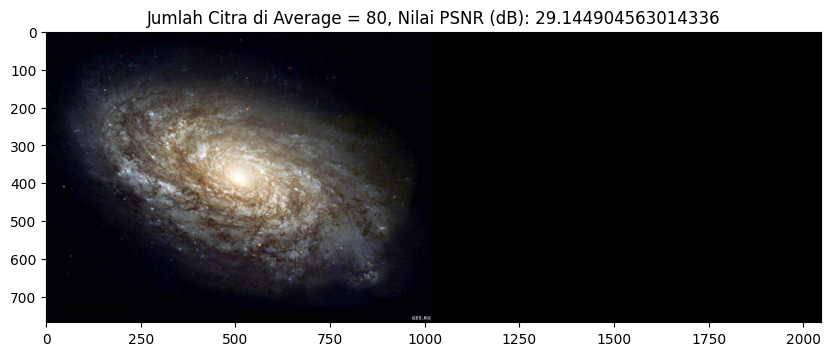

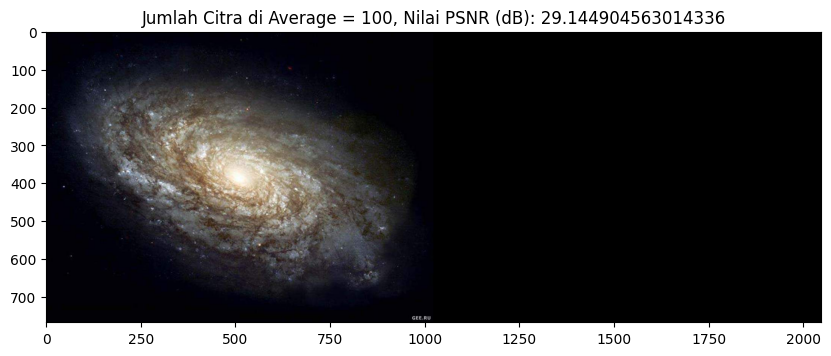

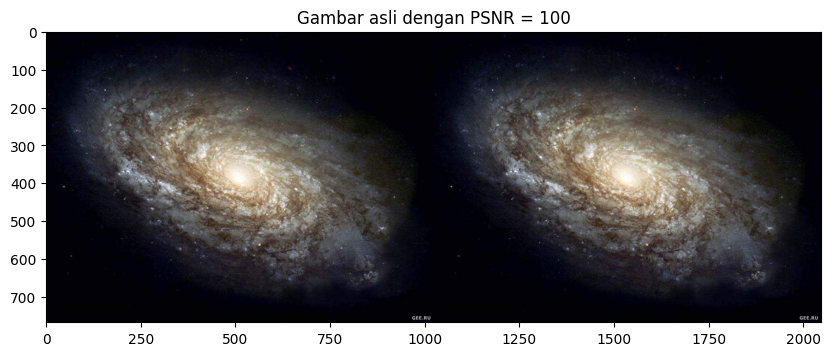

In [25]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        psnr = 100
    else:
        max_pixel = 255.0
        psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

original = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')

if original is None:
    print("Error: Gambar asli tidak ditemukan atau path salah.")
else:
    list_img = [5, 10, 20, 40, 80, 100]

    original_shape = original.shape[:2]

    for img_count in list_img:
        average_noise = np.zeros_like(original, dtype=np.float32)

        for i in range(1, img_count + 1):
            noise = cv.imread(f'/content/drive/MyDrive/PCVK/noises/{i}.jpg')

            if noise is None:
                # print(f"Error: Gambar noise {i}.jpg tidak ditemukan atau path salah.")
                continue

            noise_resized = cv.resize(noise, (original_shape[1], original_shape[0]))

            average_noise += noise_resized.astype(np.float32)

        average_noise /= img_count

        average_noise = np.clip(average_noise, 0, 255).astype(np.uint8)

        psnr = PSNR(original, average_noise)

        final_frame = cv.hconcat([original, average_noise])

        plt.figure(figsize=(10, 5))
        plt.imshow(cv.cvtColor(final_frame, cv.COLOR_BGR2RGB))
        plt.title(f"Jumlah Citra di Average = {img_count}, Nilai PSNR (dB): {psnr:}")
        plt.show()

    psnr = PSNR(original, original)
    final_frame = cv.hconcat([original, original])

    plt.figure(figsize=(10, 5))
    plt.imshow(cv.cvtColor(final_frame, cv.COLOR_BGR2RGB))
    plt.title(f"Gambar asli dengan PSNR = {psnr:}")
    plt.show()
